KNN ---> classifier (Classification)

**Question**

LAB Task:
1. Take photo form your phone
2. Save the trained model using
    ```python
    import joblib
    joblib.dump(model, 'knn.pkl')
    # load the model
    joblib.dump(classifier, 'modelname')
    # resusing the model
    loaded_model = joblib.load('modelname')
    ```

3. Create a new notebook
4.  - Reshape the image into acceptable (Gray Scale)
    - 8x8
    - Filter to enhance the image
    - flat the for row vector
    - range of values may be different

>>>>>Reusing the save method

In [106]:
import joblib

In [107]:
Model_Path="/content/drive/MyDrive/Ai Training MetaPi/Week_4/W4_D2/Save_Mode_KNN/Digit_Classification_KNN_u1"

In [108]:
Loaded_model=joblib.load(Model_Path)

#Pre-Processing Steps

*Get the image*

In [109]:
from PIL import Image,ImageOps,ImageEnhance,ImageFilter
import numpy as np
import matplotlib.pyplot as plt

In [110]:


#image_path="/content/drive/MyDrive/Ai Training MetaPi/Week_4/W4_D2/0-new.jpg"  # 8
image_path="/content/drive/MyDrive/Ai Training MetaPi/Week_4/W4_D2/4-new.jpg" #
image_path="/content/drive/MyDrive/Ai Training MetaPi/Week_4/W4_D2/4-new.jpg"   # 1



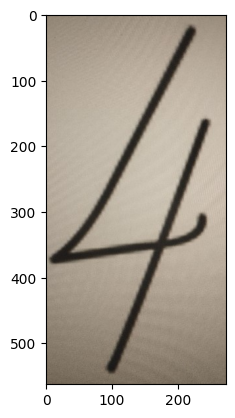

In [111]:
img=Image.open(image_path)
plt.imshow(img)

*converting to gray scale image*

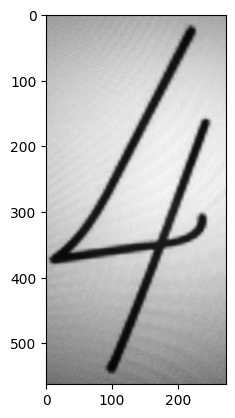

In [112]:
gray_image = img.convert("L")
plt.imshow(gray_image,cmap="gray")

*4-bit Image*

In [113]:
# Convert the grayscale image to a numpy array
grayscale_array = np.array(gray_image)

In [114]:
quantized_array = (grayscale_array // 16) * 16

In [115]:
# Create a new 4-bit image from the quantized numpy array
quantized_image = Image.fromarray(quantized_array.astype(np.uint8))

Negtive Image

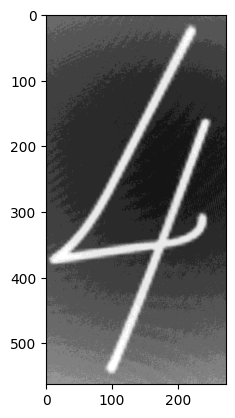

In [116]:
# Get the pixel data as a NumPy array
pixel_data = np.array(quantized_image)

# Calculate the negative of the image
negative_image = 255 - pixel_data

# Create a new Image object from the negative pixel data
negative_pil_image = Image.fromarray(negative_image)

# Save or display the negative image
plt.imshow(negative_pil_image,cmap="gray")

In [117]:
# width, height = img.size
# print("Image size (width x height):", width, "x", height)

In [118]:
# # Get the color mode of the image
# color_mode = img.mode
# # Determine the number of channels based on the color mode
# num_channels = len(color_mode)
# print("Number of channels:", num_channels)

In [119]:
# # Get the color mode of the image
# color_mode = gray_image.mode

# # Determine the number of channels based on the color mode
# num_channels = len(color_mode)

# print("Number of channels:", num_channels)

*Enhanced the image*

In [120]:
# Enhance contrast using histogram equalization
sharpened_image = negative_pil_image.filter(ImageFilter.EDGE_ENHANCE)
gray_image=sharpened_image
#plt.imshow(enhanced_image,cmap="gray")

*Reshaping the gray scale image*

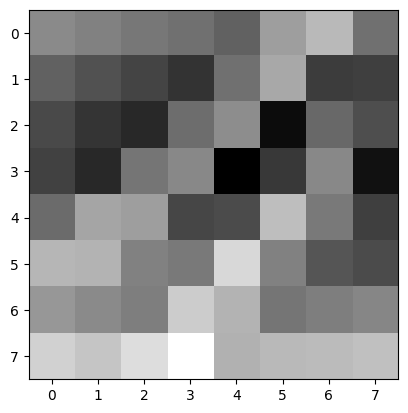

In [121]:
reshaped_gray_image = gray_image.resize((8, 8))
plt.imshow(reshaped_gray_image,cmap="gray")

*Flatten the Image*

In [122]:
reshape_np_array=np.array(reshaped_gray_image)
flat_image=reshape_np_array.flatten()

In [123]:
print(flat_image.shape)
print(flat_image.size)

(64,)
64


Testing the new data

In [124]:
test=flat_image

In [125]:
test_reshape=test.reshape(1,-1)

In [126]:
# test_reshape.shape

In [127]:
Loaded_model.predict(test_reshape)

array([1])